# Karar Ağacı Sınıflandırması: CART

CART (Classification and Regression Trees), sınıflandırma ve regresyon ağaçları anlamına gelir ve karar ağacı algoritmalarının bir türünü ifade eder. Bu algoritma, veri kümesini öğrenme ve tahminleme için ağaç yapısı kullanır. İki ana türde kullanılabilir: sınıflandırma ve regresyon.

1. **Sınıflandırma Ağacı (Classification Tree):** Veri kümesindeki örnekleri belirli sınıflara ayırmak için kullanılır. Her bir iç düğüm (node) bir testi, her bir dal (branch) ise bu teste ait farklı sonuçları temsil eder. Yaprak düğümleri, bir örneğin bir sınıfa ait olduğunu gösterir.

2. **Regresyon Ağacı (Regression Tree):** Bağımlı bir değişkenin sürekli bir değerini tahmin etmek için kullanılır. Her bir iç düğüm, bir testi temsil eder ve dallar bu teste ait farklı sonuçları gösterir. Ancak, yaprak düğümleri bir sınıf yerine sayısal bir değeri temsil eder.

CART algoritması, veri kümesini bölme işlemleri yaparak ağaç yapısını oluşturur. Bölme işlemleri, veri kümesini en homojen alt gruplara bölmeyi amaçlar. Veri kümesi her seferinde en iyi bölme kriterine göre bölünür. Bu kriter genellikle Gini impurity veya Entropi gibi ölçülerle belirlenir.

CART, ağaç yapısını oluştururken overfitting'e karşı hassas olabilir. Bu nedenle, genellikle ağacın büyüklüğünü kontrol etmek için pruning gibi teknikler kullanılır.

- **1. Exploratory Data Analysis - Keşifsel Veri Analizi**
- **2. Data Preprocessing & Feature Engineering - Veri Ön İşleme ve Özellik Mühendisliği**
- **3. Modeling using CART - CART kullanarak modelleme**
- **4. Hperparameter Optimization with GridSearchCV - GridSearchCV ile Hiperparametre Optimizasyonu**
- **5. Final Model - Son Model**
- **6. Feature Importance - Özellik Önemi**
- **7. Analyzing Model Complexity with Learning Curves (BONUS) - Öğrenme Eğrileri ile Model Karmaşıklığını Analiz Etme (BONUS)**
- **8. Visualizing the Decision Tree -  Karar Ağacını Görselleştirme**
- **9. Extracting Decision Rules - Karar Kurallarını Çıkarma** 
- **10. Extracting Python/SQL/Excel Codes of Decision Rules - Karar Kurallarının Python/SQL/Excel Kodlarını Çıkarma**
- **11. Prediction using Python Codes - Python Kodlarını Kullanarak Tahmin**
- **12. Saving and Loading Model -  Modeli Kaydetme ve Yükleme**

In [1]:
# Gerekli kütüphaneleri yüklüyoruz

!pip install pydotplus
!pip install skompiler
!pip install astor
!pip install joblib

In [2]:
# Uyarıları yönetmek için kullanılan kütüphane
import warnings

# Modelin kaydedilip yüklenmesini sağlayan kütüphane
import joblib

# DOT dilini kullanarak grafikler oluşturan kütüphane
import pydotplus

# NumPy, bilimsel hesaplamalar ve veri manipülasyonu için kullanılan kütüphane
import numpy as np

# Pandas, veri analizi ve manipülasyonu için kullanılan kütüphane
import pandas as pd

# Seaborn, veri görselleştirmesi için kullanılan kütüphane
import seaborn as sns

# Matplotlib, çeşitli grafikler oluşturmak için kullanılan kütüphane
from matplotlib import pyplot as plt

# Karar ağacı modeli ve görselleştirmek için gerekli kütüphaneler
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text

# Sınıflandırma performansını değerlendirmek için kullanılan kütüphaneler
from sklearn.metrics import classification_report, roc_auc_score

# Model eğitimi ve değerlendirmesi için kullanılan kütüphaneler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve

# Scikit-learn modellerini derlemek için kullanılan kütüphane
from skompiler import skompile

# Graphviz için Python bağlantısı
import graphviz


In [3]:
# Pandas'ta tüm sütunları göstermek için kullanılan ayar
pd.set_option('display.max_columns', None)

# Pandas'ta genişlik ayarı
pd.set_option('display.width', 500)

# Uyarıları görmezden gelme ayarı
warnings.simplefilter(action='ignore', category=Warning)


### 1. Keşifsel Veri Analizi

### 2. Veri Ön İşleme ve Özellik Mühendisliği

### 3. CART kullanarak modelleme

In [4]:
# Pandas kütüphanesini kullanarak CSV dosyasını okuma
df = pd.read_csv("datasets/diabetes.csv")

# Bağımlı değişkeni (Outcome) ayrıştırma
y = df["Outcome"]

# Bağımsız değişkenleri (Outcome hariç tüm sütunlar) ayrıştırma
X = df.drop(["Outcome"], axis=1)

# Karar Ağacı modelini oluşturma ve eğitme
cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)


In [5]:
# Karar Ağacı modeli kullanılarak tahmin yapma
y_pred = cart_model.predict(X)

# 'y_pred' değişkeni, Karar Ağacı modeli kullanılarak bağımsız değişkenlerin tahmin edilen değerlerini içerir.
# Bu değerlerle gerçek 'y' değerleri arasındaki karşılaştırmaları yaparak bir Confusion Matrix oluşturabiliriz.


In [6]:
# Karar Ağacı modeli kullanılarak olasılık tahmin etme
y_prob = cart_model.predict_proba(X)[:, 1]


In [7]:
# Confusion Matrix ve sınıflandırma raporu
confusion_matrix_report = classification_report(y, y_pred)

# Confusion Matrix ve sınıflandırma raporu ekrana yazdırma
print(confusion_matrix_report)




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



'classification_report' fonksiyonu, gerçek 'y' değerleri ve tahmin edilen 'y' değerleri arasındaki
karşılaştırmalara dayanarak sınıflandırma performansını ölçen bir rapor üretir.

In [8]:
# AUC (Alan Altında Kalan) skoru hesaplama
auc_score = roc_auc_score(y, y_prob)

# AUC skorunu ekrana yazdırma
print("AUC Score:", auc_score)


AUC Score: 1.0


 'roc_auc_score' fonksiyonu, gerçek 'y' değerleri ve sınıf olasılıkları arasındaki ilişkiye dayanarak
bir AUC skoru üretir. Bu skor, modelin sınıflandırma performansını ölçer.


Gördüğünüz gibi bütün değerler 1 çıktı yani model **%100 başarılı gibi** görünüyor. 

- Fakat %100 doğru model mümkün mü?

- Yoksa model **overfitting** mi oldu?

Tüm bu soru işaretlerine cevap aramak için başarı değerlendirme yöntemlerine ihtiyacımız var. Bunun için Holdout yöntemi uyguluyoruz.



### Holdout Yöntemi ile Başarı Değerlendirme

In [9]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

# Karar Ağacı modelini oluşturma ve eğitme (Eğitim seti üzerinde)
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)


In [10]:
# Eğitim seti üzerinde tahmin yapma
y_pred_train = cart_model.predict(X_train)

# Eğitim seti üzerinde olasılık tahmini yapma
y_prob_train = cart_model.predict_proba(X_train)[:, 1]

# Eğitim seti üzerinde sınıflandırma raporu
classification_report_train = classification_report(y_train, y_pred_train)

# Eğitim seti üzerinde AUC (Alan Altında Kalan) skoru
auc_score_train = roc_auc_score(y_train, y_prob_train)

# Eğitim seti üzerindeki sınıflandırma raporunu ve AUC skorunu ekrana yazdırma
print("Classification Report (Train Set):\n", classification_report_train)
print("AUC Score (Train Set):", auc_score_train)



Classification Report (Train Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       191

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

AUC Score (Train Set): 1.0


Eğitim setimizin sonucu da **1** geldi. Şüphemiz devam ediyor. Şimdi de test setimizi kontrol edelim

In [11]:
# Test seti üzerinde tahmin yapma
y_pred_test = cart_model.predict(X_test)

# Test seti üzerinde olasılık tahmini yapma
y_prob_test = cart_model.predict_proba(X_test)[:, 1]

# Test seti üzerinde sınıflandırma raporu
classification_report_test = classification_report(y_test, y_pred_test)

# Test seti üzerinde AUC (Alan Altında Kalan) skoru
auc_score_test = roc_auc_score(y_test, y_prob_test)

# Test seti üzerindeki sınıflandırma raporunu ve AUC skorunu ekrana yazdırma
print("Classification Report (Test Set):\n", classification_report_test)
print("AUC Score (Test Set):", auc_score_test)


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       154
           1       0.53      0.56      0.54        77

    accuracy                           0.69       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.69      0.69       231

AUC Score (Test Set): 0.6558441558441559


Görüldüğü üzere eğitim sonucu iyi gibi gözükmesine rağmen modele hiç görmediği (test) değerler verdiğimizde sonuçlar oldukça kötü, bu da demek oluyor ki modelimiz **overfitting** olmuş.

### CV ile Başarı Değerlendirme

Gözlem sayımız yeterince fazla olmadığından dolayı, modeli doğrulamak için birde çapraz doğrulama (cv) uyguluyoruz.

In [12]:
# Karar Ağacı modelini oluşturma ve eğitme (Tüm veri seti üzerinde)
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

# 5 katlı çapraz doğrulama (cross-validation) yapma
cv_results = cross_validate(cart_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [13]:
# Çapraz doğrulama sonuçlarının accuracy (doğruluk) değerlerinin ortalamasını hesaplama
average_accuracy = cv_results['test_accuracy'].mean()

# Ortalama accuracy değerini ekrana yazdırma
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.7058568882098294


In [14]:
# Çapraz doğrulama sonuçlarının F1 skorlarının ortalamasını hesaplama
average_f1_score = cv_results['test_f1'].mean()

# Ortalama F1 skorunu ekrana yazdırma
print("Average F1 Score:", average_f1_score)


Average F1 Score: 0.5710621194523633


In [15]:
# Çapraz doğrulama sonuçlarının ROC AUC skorlarının ortalamasını hesaplama
average_roc_auc = cv_results['test_roc_auc'].mean()

# Ortalama ROC AUC skorunu ekrana yazdırma
print("Average ROC AUC Score:", average_roc_auc)


Average ROC AUC Score: 0.6719440950384347


Görüldüğü üzere çapraz doğrulama sonucunda da başarı parametrelerimiz düşük seviyelerde bu da demek oluyor ki modelimizin başarı oranı %100 değilmiş.

Şimdi modelin başarılı sonuçlar vermesi için hiperparametre optimizasyonunu gerçekleştirelim.

### 4. GridSearchCV ile Hiperparametre Optimizasyonu

In [29]:
# Karar Ağacı modelinin parametrelerini görüntüleme
print("Cart Model Parameters:", cart_model.get_params())

Cart Model Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': 17, 'splitter': 'best'}


**get_params** ile parametrelerimizi görüntüledik.

Overfitting'e sebep olabilecek hiperparametreler;

**min_sample_split:2** hiperparametresinin değerini ifade eder. Bu ifade, bir iç düğümü bölmek için gereken minimum örnek sayısının 2 olduğunu gösterir.

**max_depth:None** Ağacın maksimum derinliğini kontrol eder. Büyük max_depth değerleri modelin aşırı uyum yapmasına yol açabilir.

Dolayısıyla bu hiperparametreleri belirlememiz gerekiyor;

In [30]:
# Karar Ağacı modeli için hiperparametre arama aralığını belirleme
# range aralığını belirlemek için ilgili parametrenin ön tanımlı değerinden yola çıkılır
# min_sample_split:2 olduğu için 2 den başladık.
# max_depth:None değer olmadığı için 1 den başladık.
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

# GridSearchCV ile en iyi hiperparametreleri bulma
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X, y)

# En iyi hiperparametreleri ve doğruluk skorunu görüntüleme
print("Best Hyperparameters:", cart_best_grid.best_params_)
print("Best Accuracy Score:", cart_best_grid.best_score_)

# Rastgele bir örnek seçerek Karar Ağacı modeli ile tahmin yapma
random = X.sample(1, random_state=45)
prediction = cart_best_grid.predict(random)
print("Prediction for Random Sample:", prediction)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 4}
Best Accuracy Score: 0.7500806383159324
Prediction for Random Sample: [1]


**verbose=1** komutu ile raporu yazdırdık. Rapora göre bu işlem için 180 farklı kombinasyon var ve 5 katlı çapraz doğrulama ile toplamda 900 fit işlemi sonunda 
hiperparametrelerimizin alması gerektiği değerleri bulduk. (verbose=2 olursa her aşamada bulduğu sonuçları listeler.)

**min_sample_split:4** 

**max_depth:5** 

### 5. Final Model

In [17]:
# En iyi hiperparametrelerle Karar Ağacı modelini oluşturma ve eğitme
# random_state=17 yaparsanız alacağınız sonuçlar aynı olur.
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X, y)

# Oluşturulan Karar Ağacı modelinin parametrelerini görüntüleme
print("Final Model Parameters:", cart_final.get_params())

# Alternatif bir yöntemle en iyi hiperparametrelerle Karar Ağacı modelini oluşturma ve eğitme
# var olan modelimize yeni hiperparametrelerı set ettik ve eğittik.
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)

# Çapraz doğrulama sonuçlarını görüntüleme
cv_results = cross_validate(cart_final,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

# Accuracy, F1 skoru ve ROC AUC skorlarının ortalamasını hesaplama ve ekrana yazdırma
print("Average Accuracy:", cv_results['test_accuracy'].mean())
print("Average F1 Score:", cv_results['test_f1'].mean())
print("Average ROC AUC Score:", cv_results['test_roc_auc'].mean())


Final Model Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': 17, 'splitter': 'best'}
Average Accuracy: 0.7500806383159324
Average F1 Score: 0.614625004082526
Average ROC AUC Score: 0.797796645702306


Görüldüğü üzere belirlenen parametreler ile modelimizi oluşturduğumuzda **modelimizin başarısında artış** meydana geldi.

### 6. Özellik Önemi

Feature Importances: [0.01129738 0.49448119 0.05065617 0.         0.01497644 0.22221379
 0.06819923 0.13817579]


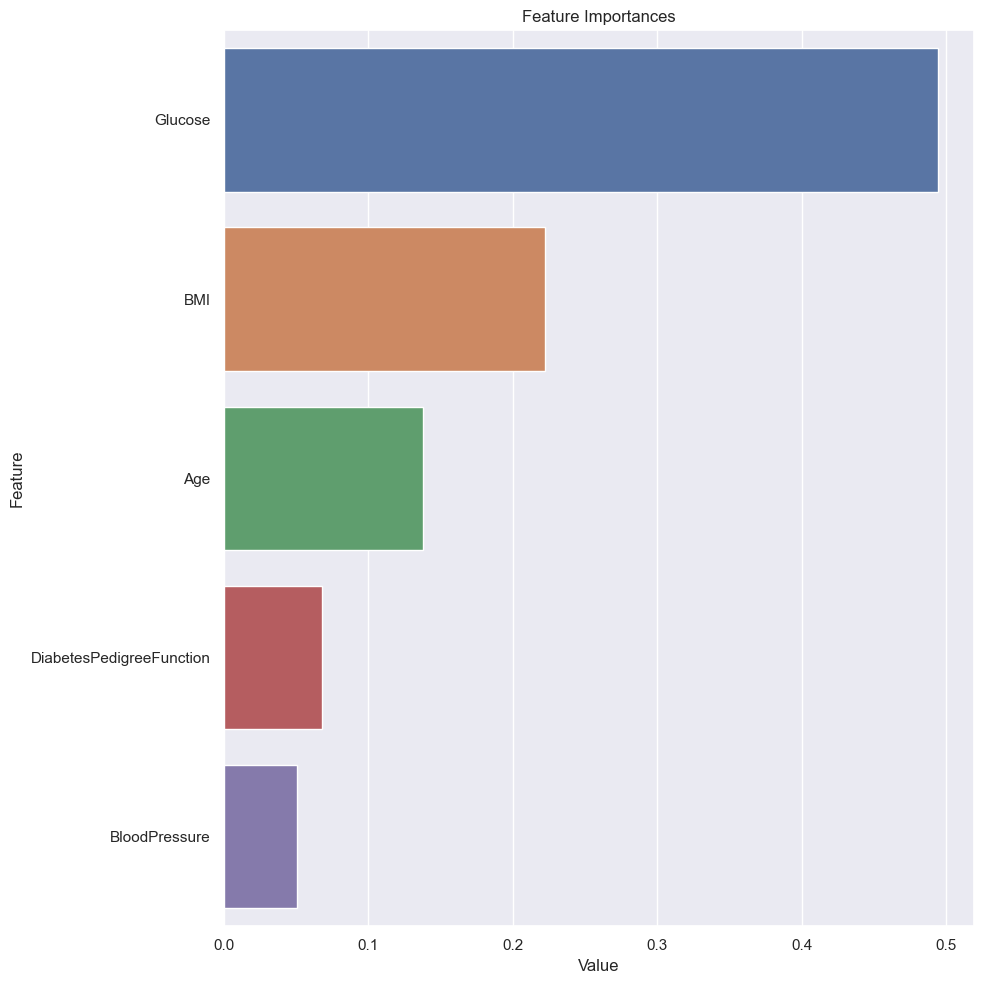

In [18]:
# Karar Ağacı modelinin özellik önem puanlarını görüntüleme
print("Feature Importances:", cart_final.feature_importances_)

# Özellik önem puanlarını görselleştiren fonksiyon tanımlama
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    
    # Görselleştirmenin boyutunu belirleme
    plt.figure(figsize=(10, 10))
    
    # Font ölçeğini ayarlama
    sns.set(font_scale=1)
    
    # Çubuk grafik oluşturma
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    
    # Grafik başlığını ekleme
    plt.title('Feature Importances')
    
    # Grafik düzenini ayarlama
    plt.tight_layout()
    
    # Grafik gösterme
    plt.show()
    
    # İsterseniz grafik dosyasını kaydetme bu kodun çalışması için 
    # def satırındaki save değeri True yapılmalıdır.
    if save:
        plt.savefig('importances.png')

# Özellik önem puanlarını görselleştirmek için fonksiyonu çağırma
# num=5 yaptığımız zaman önem düzeyine göre ilk 5 özelliği gösterecek.
plot_importance(cart_final, X, num=5)


### 7. Öğrenme Eğrileri ile Model Karmaşıklığını Analiz Etme (BONUS)

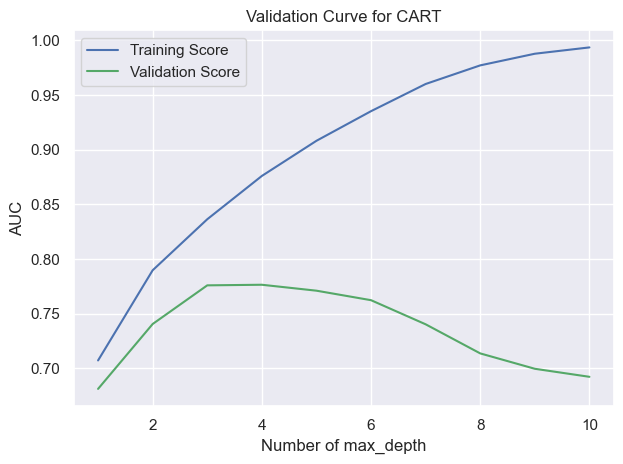

In [19]:
# max_depth hiperparametresinin değişimi için doğrulama eğrisini oluşturma
train_score, test_score = validation_curve(cart_final, X, y,
                                           param_name="max_depth",
                                           param_range=range(1, 11),
                                           scoring="roc_auc",
                                           cv=10)

# Ortalama eğitim ve test skorlarını hesaplama
mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)

# Eğitim ve test skorlarını çizimle görselleştirme
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')

#Test skoru, validation score olarak da geçmektedir.
plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')

# Çizgi grafik başlığı ve eksen etiketlerini ayarlama
plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")

# Grafik düzenini ayarlama
plt.tight_layout()

# Grafik üzerinde en iyi konumu belirtme
plt.legend(loc='best')

# Grafik gösterme
plt.show()


Görüldüğü gibi **max_dept = 3** den sonra training score ile validation score ayrışmaya başladı. Bu noktadan sonra modelin ezberlemeye başladığını söyleyebiliriz. Yani eğitim skoru arttıkça dest skoru düştü. 

En iyi hiperparametreleri belirlediğimizde max_dept parametresini 5 olarak bulmuştuk fakat bu grafiğe baktığımızda 3 olması gerekiyor gibi gözüküyor. 

Fakat burada sadece max_dept üzerinden işlem yapılıyor. Anca bizim önceki yaptığımızda işlemde **max_dept** ve **min_sample_split** eş zamanlı olarak değerlendirilmekteydi. Yani tek başına bu grafiğe bakarak max_dept hiperparametresi 3 olsun demek doğru olmaz. Burada sadece önceki bulduğumuzda değer ile buradaki değer tutarlı mı değil mi onu yorumlayabiliriz. grafikte 3 ile 5 arasında çok bir fark yokken max_depth 10 a doğru gittikçe bariz fark meydana gelmektedir.

# Hazır Fonksiyon (Dinamik) !!!

Bu fonksiyon ile ihtiyaç halinde dinamik olarak kullanılabilir ve modelerinize uygulayabiliriz.

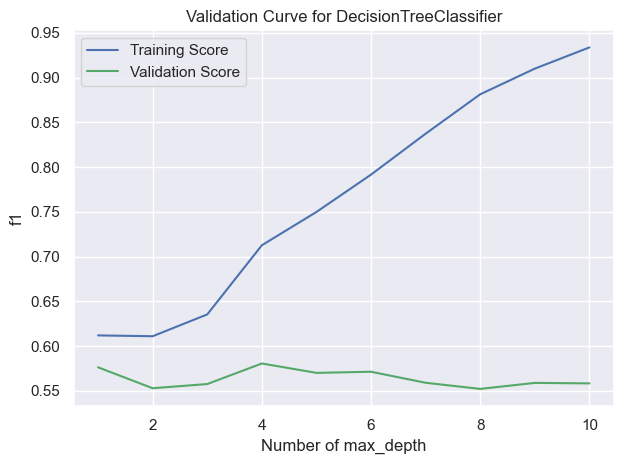

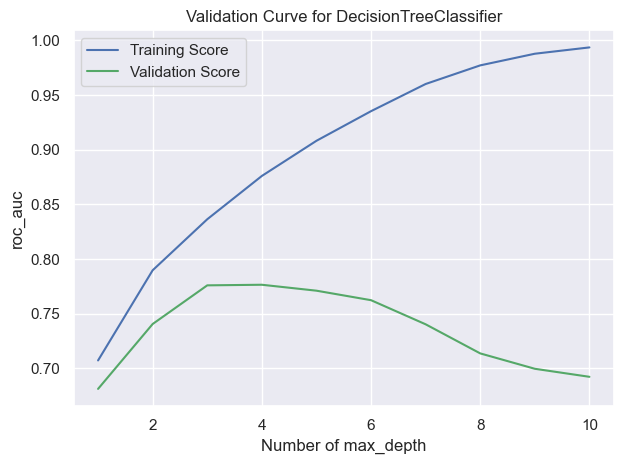

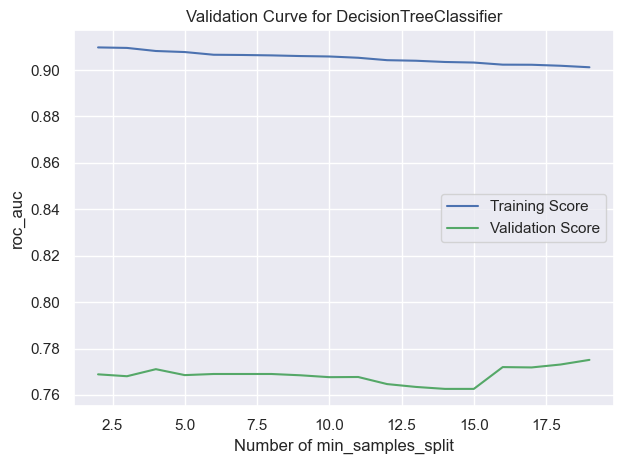

In [20]:
# Doğrulama eğrisi çizimi fonksiyonu
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    # validation_curve fonksiyonunu kullanarak eğitim ve test skorlarını elde etme
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    # Eğitim ve test skorlarının ortalamasını alma
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    # Eğitim ve test skorlarını çizimle görselleştirme
    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    # Grafik başlığı ve eksen etiketlerini ayarlama
    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    
    # Grafik düzenini ayarlama
    plt.tight_layout()
    
    # Grafik üzerinde en iyi konumu belirtme
    plt.legend(loc='best')
    
    # Grafik göster, block=True yaparsak oluşan grafikler birbirini ezmez.
    plt.show(block=True)

# Karar Ağacı modelinin 'max_depth' hiperparametresinin değişimine göre doğrulama eğrisi çizimi
# fonksiyonun varsayılan scoring=roc_auc'dur. Başka skor değeri için belirtin "f1..."
val_curve_params(cart_final, X, y, "max_depth", range(1, 11), scoring="f1")

# Çeşitli (birden fazla) hiperparametrelerin değişimine göre doğrulama eğrisi çizimi
# hiperparametre sayısı 2 den fazla ise aşağıdaki gibi devamına eklenmelidir.
cart_val_params = [["max_depth", range(1, 11)], ["min_samples_split", range(2, 20)]]

for i in range(len(cart_val_params)):
    val_curve_params(cart_model, X, y, cart_val_params[i][0], cart_val_params[i][1])


### 8. Karar Ağacını Görselleştirme

Bu adıma geçmeden önce "graphviz" yüklemeniz gerekmektedir. 

Anaconda Prompt ile İndirme:

- Bilgisayarınızdaki Anaconda Prompt'u açın.
- Aşağıdaki komutu yazın ve Enter tuşuna basın:

conda install -c conda-forge python-graphviz

In [22]:
# Karar Ağacı modelinin görselleştirmesi için fonksiyon
def tree_graph(model, col_names, file_name):
    # Karar Ağacı modelini görselleştirmek için export_graphviz fonksiyonunu kullanma
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    
    # Graphviz ile görseli oluşturma
    graph = pydotplus.graph_from_dot_data(tree_str)
    
    # Görseli belirtilen dosya adına kaydetme (PNG formatında)
    graph.write_png(file_name)

# Karar Ağacı modelini görselleştirmek ve PNG dosyasına kaydetmek
tree_graph(model=cart_final, col_names=X.columns, file_name="cart_final.png")

# Karar Ağacı modelinin parametrelerini görüntüleme
print("Final Model Parameters:", cart_final.get_params())


Final Model Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': 17, 'splitter': 'best'}


### 9. Karar Kurallarını Çıkarma

In [23]:
# Karar Ağacı modelinin kurallarını metin formatında görüntüleme
tree_rules = export_text(cart_final, feature_names=list(X.columns))

# Elde edilen kuralları ekrana yazdırma
print("Decision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |  

### 10. Karar Kurallarının Python Kodlarını Çıkarma

In [1]:
# Eğer skompile kullanmada hata alıyorsanız
# sklearn '0.23.1' versiyonu ile yapılabilir. Aşağıdaki kodu yazarak yükleyebilirsizi.

# !pip install scikit-learn==0.23.1

Oluşturulan tahmin modelini **bir sisteme entegre etmek** için (veri tabanından çıkmadan) karar kurallarını çıkarabiliriz. (Python, SQL, Excel)

In [25]:
# Tahmin fonksiyonunu Python koduna çevirme
python_code = skompile(cart_final.predict).to('python/code')
print("Predict Function in Python Code:\n", python_code)

# Tahmin fonksiyonunu SQLAlchemy/SQLite diline çevirme
sqlite_code = skompile(cart_final.predict).to('sqlalchemy/sqlite')
print("Predict Function in SQLite Code:\n", sqlite_code)

# Tahmin fonksiyonunu Excel formülüne çevirme
excel_code = skompile(cart_final.predict).to('excel')
print("Predict Function in Excel Formula:\n", excel_code)


Predict Function in Python Code:
 (((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )

Predict Function in SQLite Code:
 SELECT CASE WHEN (x2 <= 127.5) THEN CASE WHEN (x8 <= 28.5) THEN CASE WHEN (x6 <= 45.39999961853027) THEN CASE WHEN (x6 <= 30.949999809265137) THEN CASE WHEN (x1 

### 11. Elde Edilen Python Kodlarını Kullanarak Tahmin

Bu kod, bir karar ağacının içsel yapısını kullanarak özellik değerleri üzerinde tahminler yapmaktadır. Ancak, bu tahminlerin doğruluğunu değerlendirmek için gerçek etiketlere (Outcome) ihtiyaç vardır. Ayrıca, karar ağacının oluşturulma bağlamını bilemeyiz, bu nedenle özelliklerin hangi sırayla karşılaştırıldığı ve ağacın derinliği gibi bilgiler mevcut değildir.

Ancak, bu karar ağacının belirli bir sırayla özellikleri karşılaştırarak bir sonuca ulaştığına dair bir örnek görebiliriz. Eğer giriş özellikleri bu koşullarla eşleşirse, fonksiyon belirli bir sınıf (0 veya 1) için bir tahminde bulunur.

Eğer gerçek etiketleri biliyorsanız, bu tahminlerin doğruluğunu değerlendirebilirsiniz. Ancak, gerçek etiketlere sahip değilseniz, sadece bu fonksiyonların belirli girişlere karşı nasıl davrandığını görebiliriz.

In [33]:
def predict_with_rules(x):
    return ((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6864999830722809 else
        0) if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else ((1 if x[5
        ] <= 32.45000076293945 else 1 if x[3] <= 10.5 else 0) if x[2] <= 53.0 else
        ((0 if x[1] <= 111.5 else 0 if x[2] <= 72.0 else 1 if x[3] <= 31.0 else
        0) if x[2] <= 82.5 else 1) if x[4] <= 36.5 else 0) if x[6] <=
        0.5005000084638596 else (0 if x[1] <= 88.5 else (((0 if x[0] <= 1.0 else
        1) if x[1] <= 98.5 else 1) if x[6] <= 0.9269999861717224 else 0) if x[1
        ] <= 116.0 else 0 if x[4] <= 166.0 else 1) if x[2] <= 69.0 else ((0 if
        x[2] <= 79.0 else 0 if x[1] <= 104.5 else 1) if x[3] <= 5.5 else 0) if
        x[6] <= 1.098000019788742 else 1) if x[5] <= 45.39999961853027 else 0 if
        x[7] <= 22.5 else 1) if x[7] <= 28.5 else (1 if x[5] <=
        9.649999618530273 else 0) if x[5] <= 26.350000381469727 else (1 if x[1] <=
        28.5 else ((0 if x[0] <= 11.5 else 1 if x[5] <= 31.25 else 0) if x[1] <=
        94.5 else (1 if x[5] <= 36.19999885559082 else 0) if x[1] <= 97.5 else
        0) if x[6] <= 0.7960000038146973 else 0 if x[0] <= 3.0 else (1 if x[6] <=
        0.9614999890327454 else 0) if x[3] <= 20.0 else 1) if x[1] <= 99.5 else
        ((1 if x[5] <= 27.649999618530273 else 0 if x[0] <= 5.5 else (((1 if x[
        0] <= 7.0 else 0) if x[1] <= 103.5 else 0) if x[1] <= 118.5 else 1) if
        x[0] <= 9.0 else 0) if x[6] <= 0.19999999552965164 else ((0 if x[5] <=
        36.14999961853027 else 1) if x[1] <= 113.0 else 1) if x[0] <= 1.5 else
        (1 if x[6] <= 0.3620000034570694 else 1 if x[5] <= 30.050000190734863 else
        0) if x[2] <= 67.0 else (((0 if x[6] <= 0.2524999976158142 else 1) if x
        [1] <= 120.0 else 1 if x[6] <= 0.23899999260902405 else 1 if x[7] <=
        30.5 else 0) if x[2] <= 83.0 else 0) if x[5] <= 34.45000076293945 else
        1 if x[1] <= 101.0 else 0 if x[5] <= 43.10000038146973 else 1) if x[6] <=
        0.5609999895095825 else ((0 if x[7] <= 34.5 else 1 if x[5] <=
        33.14999961853027 else 0) if x[4] <= 120.5 else (1 if x[3] <= 47.5 else
        0) if x[4] <= 225.0 else 0) if x[0] <= 6.5 else 1) if x[1] <= 127.5 else
        (((((1 if x[1] <= 129.5 else ((1 if x[6] <= 0.5444999933242798 else 0) if
        x[2] <= 56.0 else 0) if x[2] <= 71.0 else 1) if x[2] <= 73.0 else 0) if
        x[5] <= 28.149999618530273 else (1 if x[1] <= 135.0 else 0) if x[3] <=
        21.0 else 1) if x[4] <= 132.5 else 0) if x[1] <= 145.5 else 0 if x[7] <=
        25.5 else ((0 if x[1] <= 151.0 else 1) if x[5] <= 27.09999942779541 else
        ((1 if x[0] <= 6.5 else 0) if x[6] <= 0.3974999934434891 else 0) if x[2
        ] <= 82.0 else 0) if x[7] <= 61.0 else 0) if x[5] <= 29.949999809265137
         else ((1 if x[2] <= 61.0 else (((((0 if x[6] <= 0.18299999833106995 else
        1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <=
        73.0 else 0) if x[0] <= 4.5 else 1 if x[6] <= 0.6169999837875366 else 0
        ) if x[6] <= 1.1414999961853027 else 1) if x[5] <= 41.79999923706055 else
        1 if x[6] <= 0.37299999594688416 else 1 if x[1] <= 142.5 else 0) if x[7
        ] <= 30.5 else (((1 if x[6] <= 0.13649999350309372 else 0 if x[5] <=
        32.45000076293945 else 1 if x[5] <= 33.05000114440918 else (0 if x[6] <=
        0.25599999725818634 else (0 if x[1] <= 130.5 else 1) if x[0] <= 8.5 else
        0) if x[0] <= 13.5 else 1) if x[2] <= 92.0 else 1) if x[5] <=
        45.54999923706055 else 1) if x[6] <= 0.4294999986886978 else (1 if x[5] <=
        40.05000114440918 else 0 if x[5] <= 40.89999961853027 else 1) if x[4] <=
        333.5 else 1 if x[2] <= 64.0 else 0) if x[1] <= 157.5 else ((((1 if x[7
        ] <= 25.5 else 0 if x[4] <= 87.5 else 1 if x[5] <= 45.60000038146973 else
        0) if x[7] <= 37.5 else 1 if x[7] <= 56.5 else 0 if x[6] <=
        0.22100000083446503 else 1) if x[6] <= 0.28849999606609344 else 0) if x
        [6] <= 0.3004999905824661 else 1 if x[7] <= 44.0 else (0 if x[7] <=
        51.0 else 1 if x[6] <= 1.1565000414848328 else 0) if x[0] <= 6.5 else 1
        ) if x[4] <= 629.5 else 1 if x[6] <= 0.4124999940395355 else 0)

X.columns

# Tahmin için daha önce görmediği hasta bilgilerini giriyoruz.
x = [12, 13, 20, 23, 4, 55, 12, 7]

# Elde edilen python kodları ile oluşturduğumuz fonksiyonu çalıştırıyoruz.
predict_with_rules(x)



0

Girilen bilgilere göre (x) hastanın diabet olmadığı tahmin edildi.

In [32]:
# Tahmin için daha önce görmediği hasta bilgilerini giriyoruz.
x = [6, 148, 70, 35, 0, 30, 0.62, 50]

# Elde edilen python kodları ile oluşturduğumuz fonksiyonu çalıştırıyoruz.
predict_with_rules(x)

1

Girilen bilgilere göre (x) hastanın diabet olduğu tahmin edildi.

### 12. Modeli Kaydetme ve Yükleme

In [28]:
# Karar ağacı modelini diske kaydetme
joblib.dump(cart_final, "cart_final.pkl")

# Diske kaydedilen modeli yükleme
cart_model_from_disc = joblib.load("cart_final.pkl")

# Yeni bir giriş verisi
x = [12, 13, 20, 23, 4, 55, 12, 7]

# Tahmin yapma
prediction = cart_model_from_disc.predict([x])

# Tahmin sonucunu ekrana yazdırma
print("Tahmin Sonucu:", prediction)

Tahmin Sonucu: [1]


Bu kod parçası, **joblib** kullanarak bir karar ağacı modelini diske kaydeder, daha sonra bu modeli diske kaydedilen dosyadan yükler ve son olarak yeni bir giriş verisi üzerinde tahmin yapar. **joblib** kütüphanesi, modelin sıfır kayıp ile (losslessly) diske kaydedilmesini sağlar.

Bu sayede oluşturduğunuz modeli daha sonra yükleyerek yeni tahminler yapabiliriz. Ayrıca oluşturulan modeli başka kişiler ile paylaşarak onların da bu model ile tahmin yapabilmesini sağlayabiliriz.